# Introduction

> Customer churn rate is a problem for every company with a subscription-based business model. Today we're looking at a fictional [telecom dataset](http://www.sgi.com/tech/mlc/db/churn.data). Using machine learning methods, we'll come up with a business plan to address how to deal with improving the churn rate.

# Getting started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Read the data

In [2]:
df = pd.read_csv("data/churn.csv")

In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


> Messy data! Let's do some cleaning.

# Preprocessing

In [4]:
df = df.replace(to_replace=["False.","no"], value=0) \
        .replace(to_replace=["True.", "yes"], value=1) \
        .rename(columns={"Churn?": "Churn"})

In [5]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan          int64
VMail Plan          int64
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn               int64
dtype: object

> This ensures we won't have any type errors.

# Exploratory data analysis

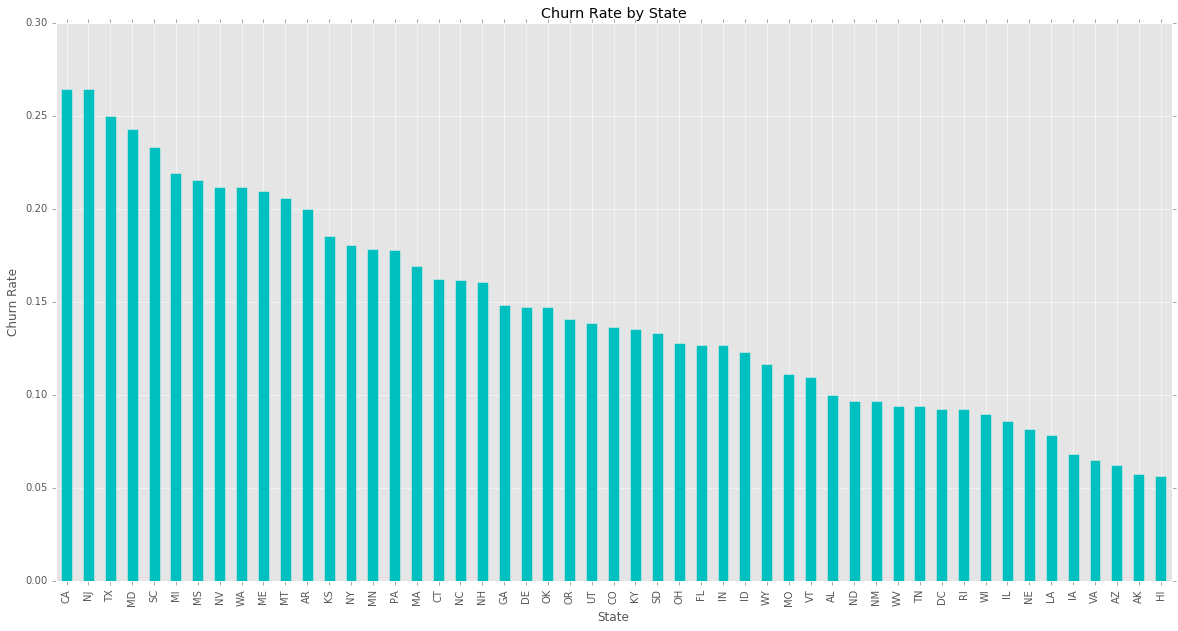

In [7]:
df.groupby(["State"]).mean()["Churn"].sort_values(ascending=False).plot(kind="bar", figsize=(20,10), color="c")
plt.title("Churn Rate by State")
plt.ylabel("Churn Rate");

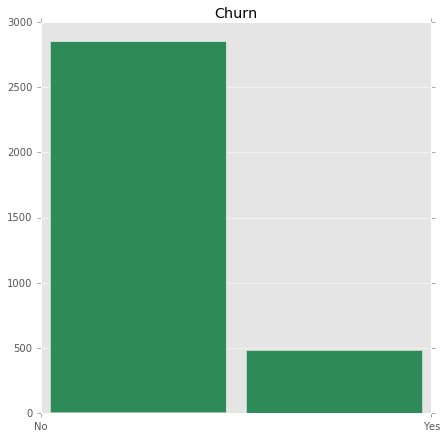

In [8]:
df.hist("Churn", figsize=(7,7), bins=2, color="#2E8B57", rwidth=0.9 )
plt.xticks(np.arange(2),("No","Yes"));

>Churn rate as a class is fairly unbalanced, this will help determine which model to use.

In [9]:
df[["State", "Area Code"]][:20]

,State,Area Code
0,KS,415
1,OH,415
2,NJ,415
3,OH,408
4,OK,415
5,AL,510
6,MA,510
7,MO,415
8,LA,408
9,WV,415


# Feature selection

>"Phone" is totally random and can be safely dropped. Figuring out how to deal with "State" and "Area Code" isn't as straightforward. The only area codes represented are from the Bay Area, which is where the users may have originally signed up and thus are not very useful. There may be confounding variables based on state of residence (income, signal strength, etc.) but these are unmeasurable--or at least unmeasured in this dataset. Thus "State" and "Area Code" are dropped.

In [10]:
del df["Phone"], df["State"], df["Area Code"]

In [11]:
df.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


> "Churn" is the target variable, the rest of the dataframe make up the predictor variables ("data")

In [12]:
data = df[df.columns[:-1]]
target = df["Churn"]

> Split the dataset into train and test portions to perform model testing and validation

In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

# Model evaluation

> What's the best metric for comparing models? Since the classes are unbalanced, model accuracy is not enough (correct guesses / total guesses). If we were naively to predict all customers to not churn, we would have ~85% accuracy. Knowing this, we should use either precision or recall.

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png")

> Because losing a customer is more costly than whatever measures are taken to prevent a customer from leaving, minimizing false negatives (saying a customer wouldn't churn and they do), is the number to minimize. Thus, recall will be our primary model metric, while still considering precision.

## The models: Logistic Regression and Random Forest

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [17]:
lr = LogisticRegression(penalty='l2')

In [18]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
lr_pred = lr.predict(X_test)

> A nice aspect of logistic regression is that the coefficients have a probabilistic interpretation.

In [20]:
lrfeatures = zip(df.columns, lr.coef_[0])
sorted_lrfeatures = sorted(lrfeatures, key = lambda feature: feature[1], reverse=True)
print "FEATURE RANKINGS:"
print
for elem in sorted_lrfeatures:
    print "{0}: {1}".format(elem[0], elem[1])

FEATURE RANKINGS:

Int'l Plan: 1.86288058612
CustServ Calls: 0.481535472217
Intl Mins: 0.0297639319866
Night Charge: 0.0183645172417
Intl Charge: 0.0171570491849
VMail Message: 0.0153945463415
Day Mins: 0.00957739998853
Day Charge: 0.00732781398402
Eve Mins: 0.00577128475757
Night Mins: 0.00154116693028
Account Length: -0.000753163514742
Day Calls: -0.00140617252575
Night Calls: -0.00390377925846
Eve Calls: -0.00440290042782
Eve Charge: -0.0117945373343
Intl Calls: -0.128200505058
VMail Plan: -1.44171128501


> ...but prediction isn't so good in this case because of the unbalanced classes

In [21]:
print "Logistic regression recall:", recall_score(y_test, lr_pred)
print "Logistic regression precision:", precision_score(y_test, lr_pred)
print "Logistic regression F1 score:", f1_score(y_test, lr_pred)

Logistic regression recall: 0.142857142857
Logistic regression precision: 0.514285714286
Logistic regression F1 score: 0.223602484472


> In order to prevent overfitting, a random forest classifier model will be used

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [23]:
print "Random forest recall:", recall_score(y_test, rf_pred)
print "Random forest precision:", precision_score(y_test, rf_pred)
print "Random forest F1 score:", f1_score(y_test, rf_pred)

Random forest recall: 0.642857142857
Random forest precision: 0.880434782609
Random forest F1 score: 0.743119266055


In [24]:
rffeatures = zip(df.columns, rf.feature_importances_)
sorted_rffeatures = sorted(rffeatures, key = lambda feature: feature[1], reverse=True)
print "FEATURE RANKINGS:"
print
for elem in sorted_rffeatures:
    print "{0}: {1}".format(elem[0], elem[1])

FEATURE RANKINGS:

Day Charge: 0.167762549415
CustServ Calls: 0.135732546023
Day Mins: 0.108863670589
Eve Charge: 0.0736820629695
Eve Mins: 0.0700350655014
Int'l Plan: 0.0639453759372
Intl Charge: 0.0523997033717
Intl Calls: 0.0462395906173
Night Mins: 0.0405326074351
Account Length: 0.0392147650967
VMail Message: 0.035930924825
Night Charge: 0.0346720108607
Night Calls: 0.0342103636054
Intl Mins: 0.0330529902508
Day Calls: 0.0317478660018
Eve Calls: 0.0223325859957
VMail Plan: 0.00964532150497


> One feature that was \#2 for both logistic regression and random forest model is "CustServ Calls," how many times the customer called customer service. Let's see how many times, on average, a customer who churned called customer service compared to a customer who didn't churn.

In [25]:
custserv1 = df[df["Churn"]==1].groupby("CustServ Calls").count()["Churn"]
custserv1 = custserv1/sum(custserv1)

In [26]:
custserv0 = df[df["Churn"]==0].groupby("CustServ Calls").count()["Churn"]
custserv0 = custserv0/sum(custserv0)

In [27]:
churn_yes = df[df["Churn"] == 1]["CustServ Calls"]
churn_no = df[df["Churn"] == 0]["CustServ Calls"]

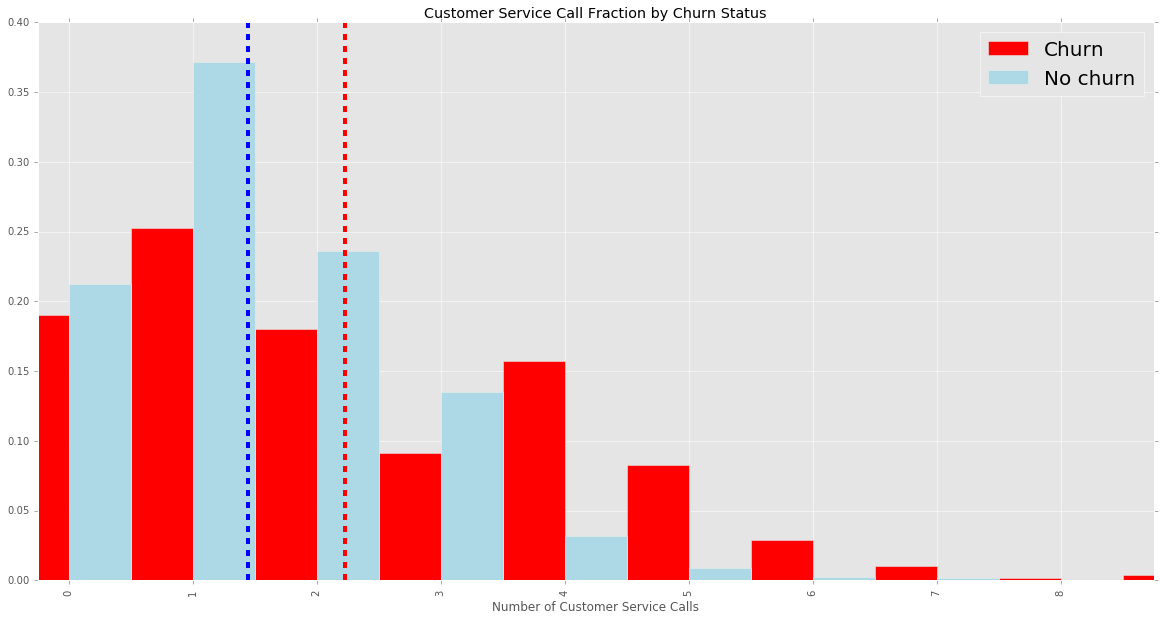

In [28]:
custserv1.plot(kind='bar', color='red', position=1, figsize=(10,10), label="Churn")
custserv0.plot(kind='bar', color='#ADD8E6',position=0, figsize=(20,10), label ="No churn")
plt.title("Customer Service Call Fraction by Churn Status")
plt.xlabel("Number of Customer Service Calls")
plt.axvline(np.mean(churn_no), color='blue', linestyle='dashed', linewidth=4)
plt.axvline(np.mean(churn_yes), color='red', linestyle='dashed', linewidth=4)
plt.legend(loc="upper right",prop={'size':20});

> The distributions both skew right, so the median is a better statistic for central tendency.

In [29]:
print "MEDIAN # OF CUST SERVICE CALLS:"
print
print "Churn:", np.round(np.median(churn_yes),2)
print "No churn:", np.round(np.median(churn_no),2);

MEDIAN # OF CUST SERVICE CALLS:

Churn: 2.0
No churn: 1.0


> The median is higher, but let's run a statistical test to make sure the difference isn't by chance.

In [30]:
from scipy.stats import median_test
_, p, _, _ = median_test(churn_yes, churn_no)

In [31]:
print "P-value: ", p

P-value:  1.06717772571e-08


> **The average of customer service calls is indeed higher for customers who churn.**

# Action plan

## Customer service policy

> Once customers have made their third call to customer service, they're at risk of churning. Starting with their third call, have customer service representatives offer them incentives. If the customer continues to call customer service, continue to offer incentives (up to a threshold).

## Persist the model so it's reusable (example)

In [33]:
from sklearn.externals import joblib
joblib.dump(rf, 'model.pkl') 

['model.pkl',
 'model.pkl_01.npy',
 'model.pkl_02.npy',
 'model.pkl_03.npy',
 'model.pkl_04.npy',
 'model.pkl_05.npy',
 'model.pkl_06.npy',
 'model.pkl_07.npy',
 'model.pkl_08.npy',
 'model.pkl_09.npy',
 'model.pkl_10.npy',
 'model.pkl_11.npy',
 'model.pkl_12.npy',
 'model.pkl_13.npy',
 'model.pkl_14.npy',
 'model.pkl_15.npy',
 'model.pkl_16.npy',
 'model.pkl_17.npy',
 'model.pkl_18.npy',
 'model.pkl_19.npy',
 'model.pkl_20.npy',
 'model.pkl_21.npy',
 'model.pkl_22.npy',
 'model.pkl_23.npy',
 'model.pkl_24.npy',
 'model.pkl_25.npy',
 'model.pkl_26.npy',
 'model.pkl_27.npy',
 'model.pkl_28.npy',
 'model.pkl_29.npy',
 'model.pkl_30.npy',
 'model.pkl_31.npy',
 'model.pkl_32.npy',
 'model.pkl_33.npy',
 'model.pkl_34.npy',
 'model.pkl_35.npy',
 'model.pkl_36.npy',
 'model.pkl_37.npy',
 'model.pkl_38.npy',
 'model.pkl_39.npy',
 'model.pkl_40.npy',
 'model.pkl_41.npy']

In [34]:
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False, header="Churn")

In [35]:
rf2 = joblib.load('model.pkl') 
X_test2 = pd.read_csv("X_test.csv")
y_test2 = pd.read_csv("y_test.csv")

In [36]:
rf2_pred = rf2.predict(X_test2)
recall_score(y_test2, rf2_pred)

0.72072072072072069

# Future directions

## Experimentation

> You can perform a randomized controlled trial by giving some customers who call customer service no incentives and compare the churn rate between these two groups.

## Tuning of model parameters

> If you had more data, you could run a grid search over hyperparameters. It probably wouldn't be useful in this case because it would overfit the data. More data means you're able to hold out more subsamples for testing.

In [34]:
from sklearn.grid_search import GridSearchCV

In [35]:
rf_parameters = { 
    'n_estimators': [20, 50, 80, 100, 200, 500],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [None, 8, 10],
    'bootstrap': [True, False],
    'max_features': ['log2', None]}

In [38]:
grid = GridSearchCV(rf, rf_parameters, scoring="f1",n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [20, 50, 80, 100, 200, 500], 'max_features': ['log2', None], 'bootstrap': [True, False], 'max_depth': [None, 8, 10], 'min_samples_leaf': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [39]:
grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [41]:
rf_grid = RandomForestClassifier(n_estimators=500,min_samples_leaf=1, max_features='log2', max_depth=None, bootstrap=True)

In [43]:
rf_grid.fit(X_train, y_train)
rf_grid_pred = rf_grid.predict(X_test)

In [44]:
print "Gridsearch random forest recall:", recall_score(y_test, rf_grid_pred)
print "Gridsearch random forest precision:", precision_score(y_test, rf_grid_pred)
print "Gridsearch random forest F1 score:", f1_score(y_test, rf_grid_pred)

Gridsearch random forest recall: 0.689655172414
Gridsearch random forest precision: 0.919540229885
Gridsearch random forest F1 score: 0.788177339901


> Of course, more estimators for ensemble methods generally results in better performance. As an example, we can plot the F1-score of several random forest models with increasing numbers of trees (estimators).

In [73]:
def plot_rf(n, metric="recall"):
    """ 
        Plots the recall_score of RandomForestClassifier by number of trees used
        Input: Number of trees in Random Forest, metric (optional, "recall" by default)
        Output: Line chart plotting some metric by number of trees (estimators) 
    """
    n_trees = []
    scores = []
    for i in range(10,n+1,20):
        n_trees.append(i)
        
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(X_train, y_train)
        pred = rf.predict(X_test)
        score = eval(metric + "_score(y_test, pred)")
        scores.append(score)
        
    plt.figure(figsize=(15,10))
    plt.plot(n_trees, scores)
    plt.title("{0} by Number of Trees in Random Forest".format(metric.title()));

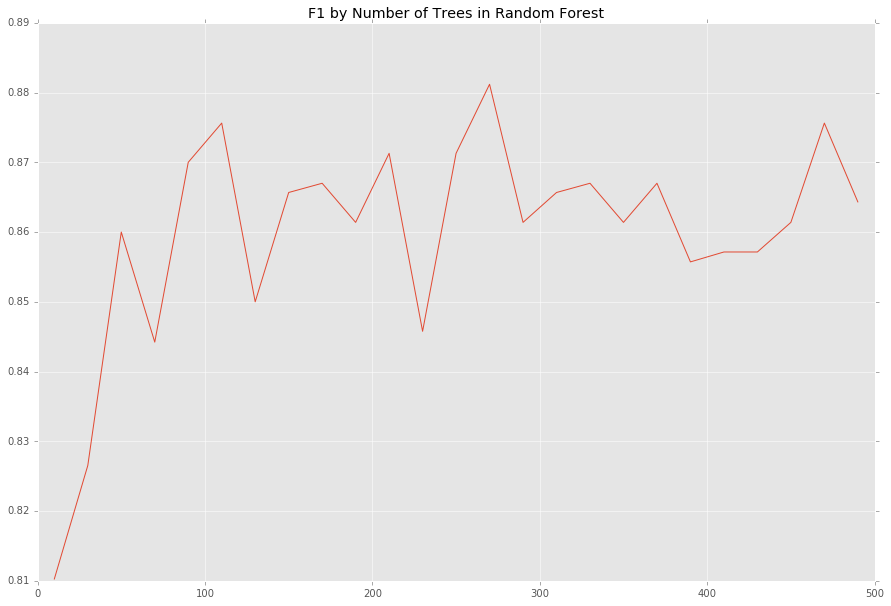

In [75]:
plot_rf(500,metric="f1")